# Check the feature importance of this output Model

Plot feature importances...


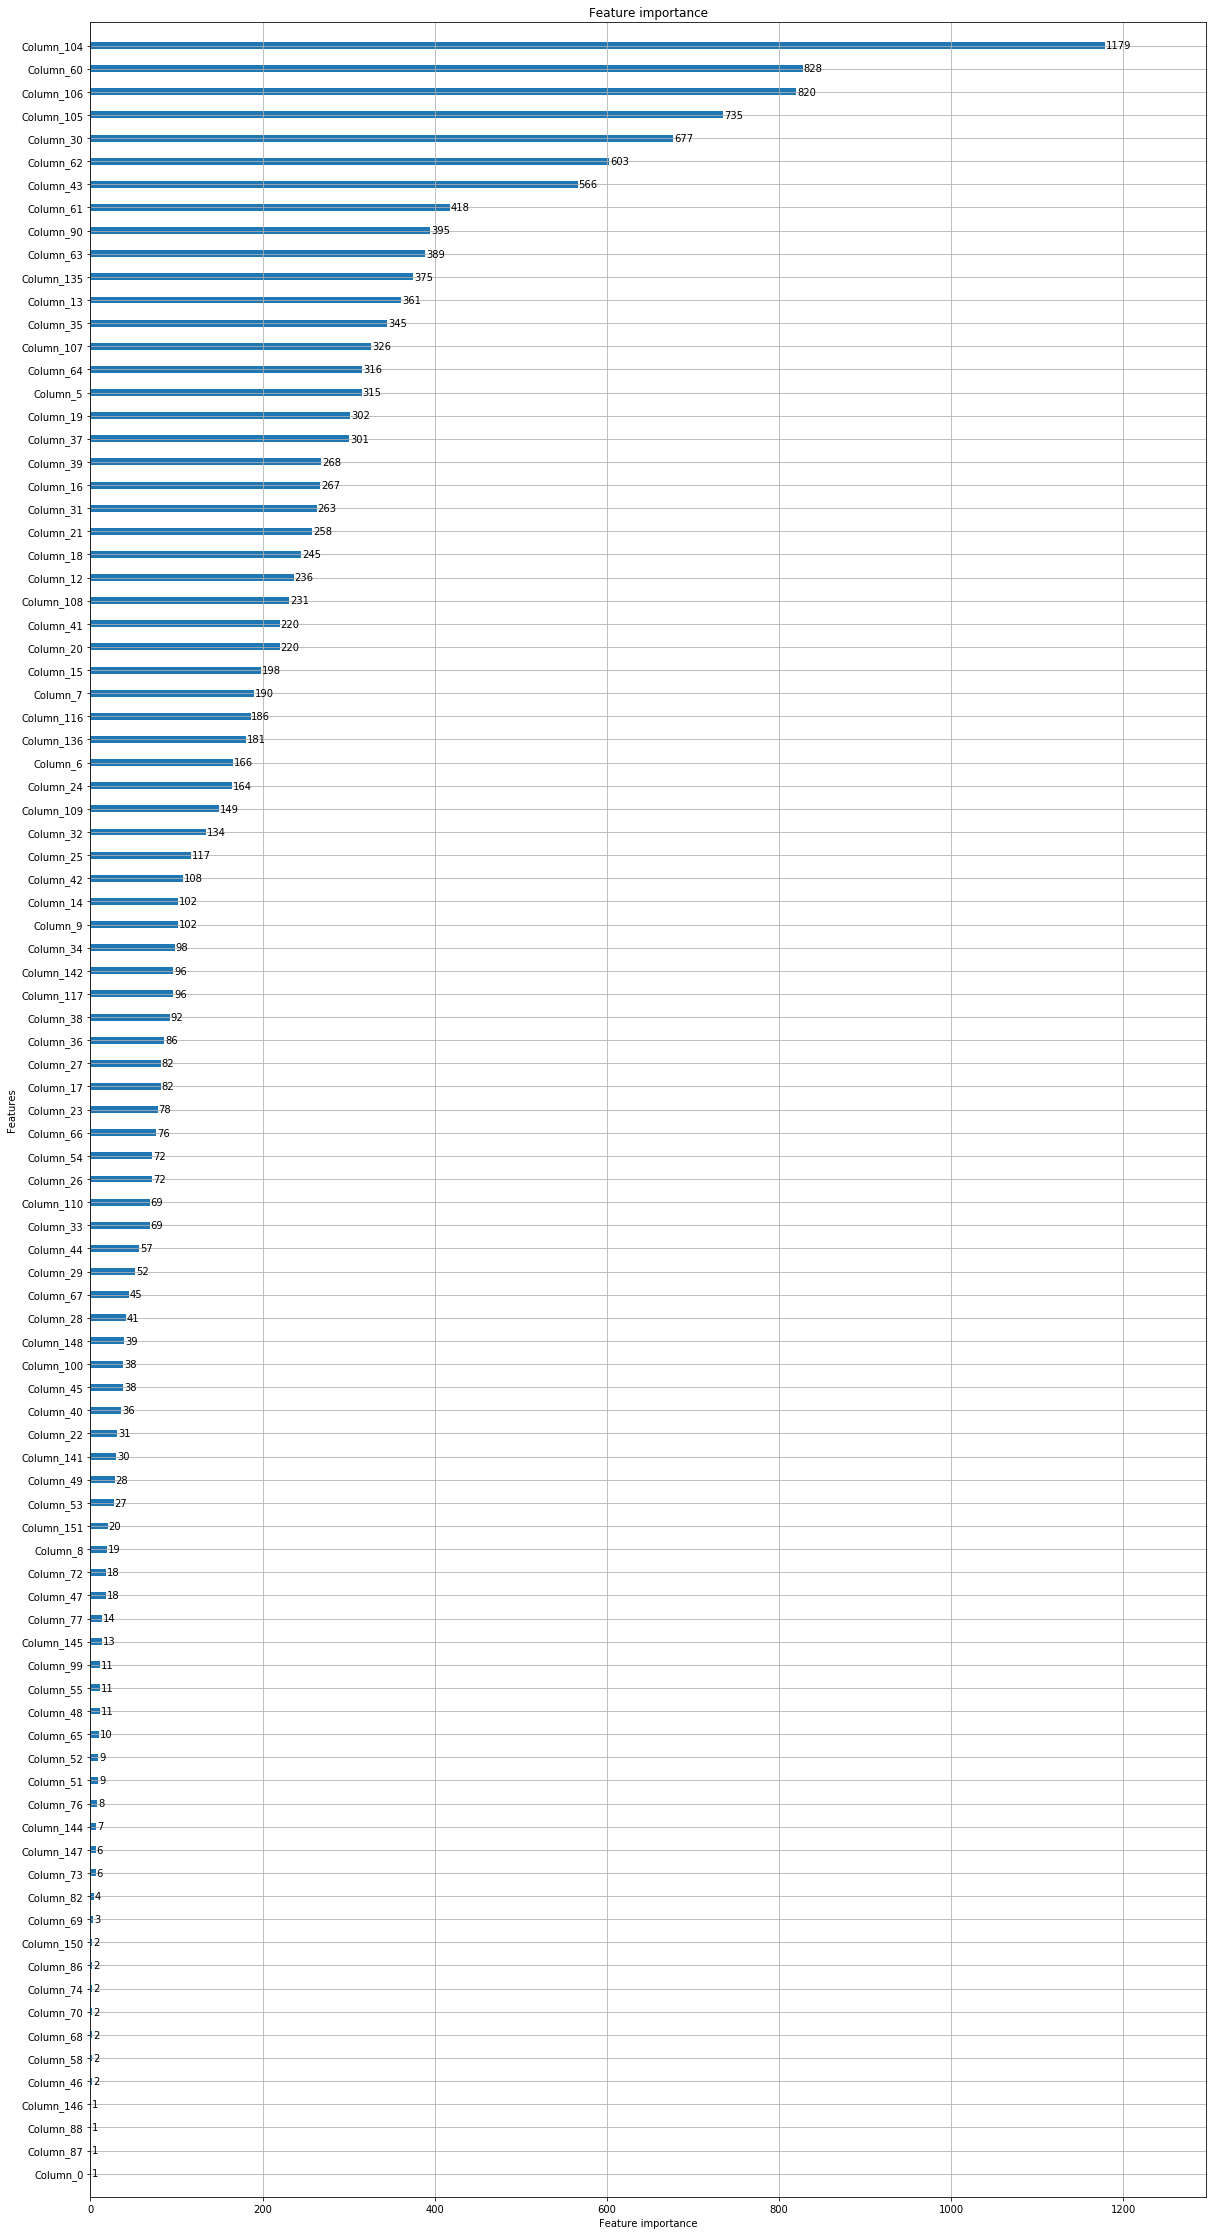

In [33]:
# coding: utf-8
# pylint: disable = invalid-name, C0111
import lightgbm as lgb
import pandas as pd
try:
    import matplotlib.pyplot as plt
except ImportError:
    raise ImportError('You need to install matplotlib for plot_example.py.')

print('Plot feature importances...')
bst = lgb.Booster(model_file='./LightGBM_model.txt')
ax = lgb.plot_importance(bst, height= 0.3, max_num_features=100, figsize=(20,40))
plt.show()

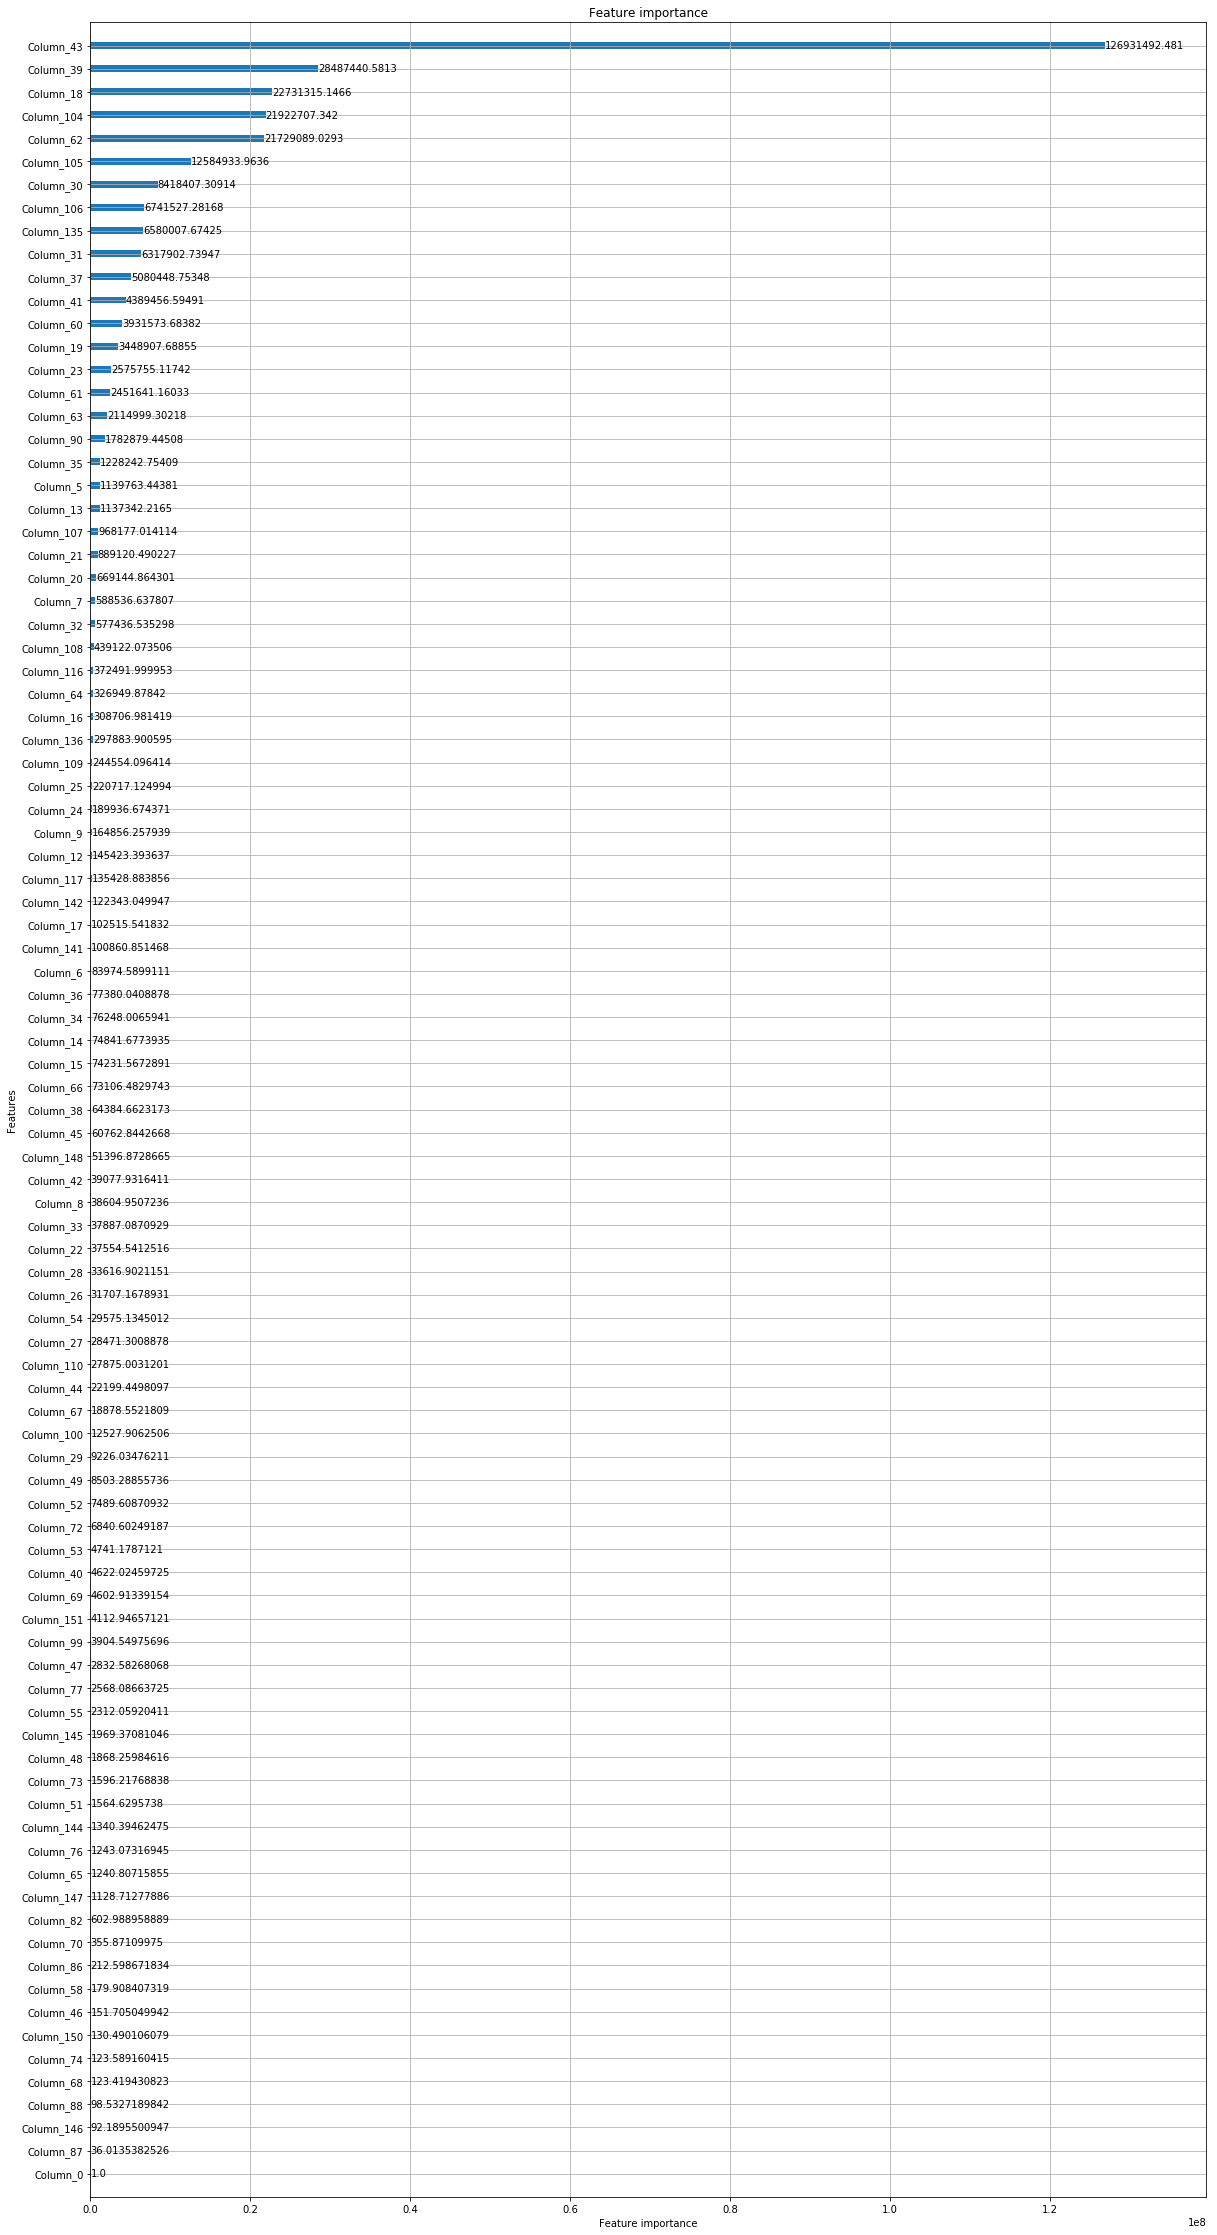

In [34]:
ax = lgb.plot_importance(bst, height= 0.3, importance_type = 'gain', max_num_features=100,figsize=(20,40))
plt.show()

# Check the feature importance of specified feature

In [35]:
importance = bst.feature_importance(importance_type='split')
print "Feature importance [split]: ", importance[104]
importance = bst.feature_importance(importance_type='gain')
print "Feature importance [gain]: ", importance[104]


Feature importance [split]:  1179
Feature importance [gain]:  21922707.342


# Check feature importance change

In [1]:
def get_feature_dict(bst, importance_type='split'):
    rank_dict = {}
    importance = bst.feature_importance(importance_type='split')
    tuples = sorted(zip(range(len(importance)), importance), key=lambda x: x[1], reverse=True)
    for i in xrange(len(tuples)):
        fid, imp = tuples[i]
        rank_dict[fid] = (i + 1, imp)
    return rank_dict

def check_feature_importance_change(base_bst, bst, importance_type):
    rank_dict = get_feature_dict(bst, importance_type)
    base_rank_dict = get_feature_dict(base_bst, importance_type)
    importance = bst.feature_importance(importance_type)
    base_importance = base_bst.feature_importance(importance_type)

    for i in xrange(5, max(len(importance), len(base_importance))):
        rank = "None"
        base_rank = "None"
        if i in rank_dict and rank_dict[i][1] != 0:
            rank = str(rank_dict[i][0])
        if i in base_rank_dict and base_rank_dict[i][1] != 0:
            base_rank = str(base_rank_dict[i][0])
    
        if rank == "None" and base_rank == "None":
            continue
    
        print "feature " + str(i) + ": " + "base_rank " + base_rank +  " --> rank " + rank

# Compare the feature importance change with baseline model.
base_bst = lgb.Booster(model_file='./baseline_LightGBM_model.txt')
check_feature_importance_change(base_bst, bst, 'split')

NameError: name 'lgb' is not defined

# Check the score distribution of this output Model

We have 7477638 samples.


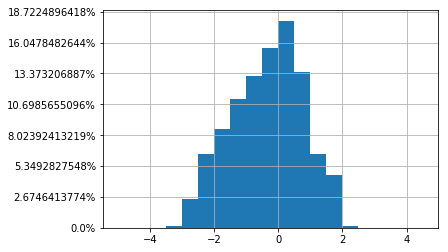

lambda score 中位数 -0.226377070203
lambda score 最大值 2.57427040862
lambda score 最小值 -3.92485850465


In [36]:
from numpy.random import randn
import matplotlib
from matplotlib.ticker import FuncFormatter
import numpy as np
import math
%matplotlib inline
plt.grid(True)

def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y / len(l))
    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

l = []
with open('LightGBM_predict_result.txt','r') as f:
    for line in f:
        try:
            l.append(float(line.strip()))
        except:
            pass
print "We have " + str(len(l)) + " samples."

plt.hist(l, bins=np.arange(-5, 5, 0.5))
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

print "lambda score 中位数", np.median(l)
print "lambda score 最大值", np.max(l)
print "lambda score 最小值", np.min(l)

# Check the lamdamart normalization function

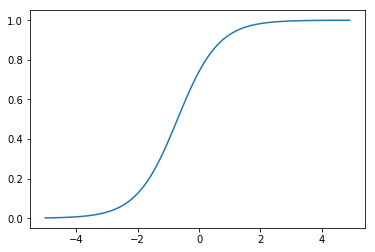

In [37]:
x = np.arange(-5, 5, 0.1)
plt.plot(x, 1.0 /(1.0+ np.exp((x + 0.7) * -1.5)))
plt.show()